Points de la phase n°2 (80% des points) Absisse en vecteur 

[ 0  1  2  3 -8  4  5 -7]
Points de la phase n°3(20% des points) Absisse en vecteur 

[-10  -9]
Le vecteur toute classe confondue :
[0 0 0 1 1 0 1 0 0 1]


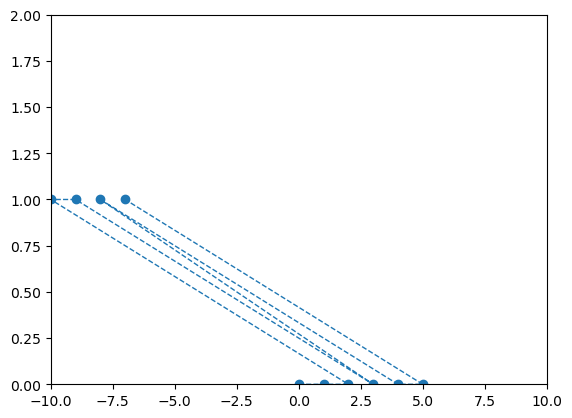

In [45]:
#TP1 Apprentissage d'un neurone d'un ensemble de points répartis
import numpy as np
import random
import matplotlib.pyplot as pyplot

#Q1
points_Q2=[]
points_Q3=[]

#points_Q2_y=[]
#points_Q3_y=[]

#C'est pour le graphique
points_x=[]
points_y=[]


def repartition_points(tab):
    #Il faut faire un vecteur
    nb_hasard=random.randint(2,3)
    for i in range(0,len(tab)):
        
        # 2 pour la Q2 et 3 pour la Q3
        if len(points_Q2)<8 and nb_hasard==2:
            points_Q2.append(tab[i]) #On ajoute la valeur de l'abcisse
            
            if tab[i]>=0:
                points_y.append(0)
            elif tab[i]<0:
                points_y.append(1)
            points_x.append(tab[i])
                
            if len(points_Q2)==8:
                nb_hasard=3 #Le reste ira à Q3
                
            elif len(points_Q2)<8 and len(points_Q3)<2:
                nb_hasard=random.randint(2,3) #On rechoisi entre 2 et 3
                
        elif len(points_Q3)<2 and nb_hasard==3:
            points_Q3.append(tab[i]) #On ajoute la valeur de l'abcisse
            
            if tab[i]>=0:
                points_y.append(0)
            elif tab[i]<0:
                points_y.append(1)
            points_x.append(tab[i])

            if len(points_Q3)==2:
                nb_hasard=2 #Le reste ira à Q2
                
            elif len(points_Q2)<8 and len(points_Q3)<2:
                nb_hasard=random.randint(2,3) #On rechoisi entre 2 et 3
        
        #end 1er if
    #end for
    
    #On affiche les deux tableaux
    print("Points de la phase n°2 (80% des points) Absisse en vecteur \n")
    print(np.array(points_Q2))
      
    print("Points de la phase n°3(20% des points) Absisse en vecteur \n")
    print(np.array(points_Q3))
#End function

#Creation du dataset pour l'entraineent du neurone.
tab_random_choice=[]
max_abscisce=10

x_zero=[]#abscisse pour la classe 0
x_un=[]#abscisse pour la classe 1
y_zero=[]#ordonnée pour la classe 0
y_un=[]#ordonnée pour la classe 1

association_classe_abcisse=[]#facile pour établir
commencement_x_0=0
commencement_x_1=-10

for i in range(max_abscisce): #Pour la création des abscises
    classe=random.randint(0,1)
    tab_random_choice.append(classe)# On sauvegarde le choix dans tableau
    


for e in range(len(tab_random_choice)):
    
    #print(str(tab_random_choice[e])) #Affichage aléatoire des 0 et des 1
    if(tab_random_choice[e]==0):
        x_zero.append(commencement_x_0)
        y_zero.append(tab_random_choice[e])
        
        #Cette valeur doit être préservé avec son "tab_random_choice[e]" pour que lorsque l'attribution des classes sera faite, on puisse retrouver sa valeur en x avec le bon 0
        association_classe_abcisse.append(commencement_x_0)  #valeur abcisse
        #association_classe_abcisse.append(tab_random_choice[e]) #On stocke la classe 0
        
        commencement_x_0=commencement_x_0+1
    elif(tab_random_choice[e]==1):
        x_un.append(commencement_x_1)
        y_un.append(tab_random_choice[e])
        
        #Cette valeur doit être préservé avec son "tab_random_choice[e]" pour que lorsque l'attribution des classes sera faite, on puisse retrouver sa valeur en x avec le bon 1
        association_classe_abcisse.append(commencement_x_1) #valeur abcisse
        #association_classe_abcisse.append(tab_random_choice[e]) #On stocke la classe 1
        commencement_x_1=commencement_x_1+1
        
#Il faut garder 8 point de n'importe quelle classe pour la Q2 et 2 points de n'importe quellle classe pour la Q3.
#L'objectif étant de préparer la phase d'entrainement (Q2) et la phase de test (Q3)

#Démarrage de la fonction de repartion des points de la dataset

repartition_points(association_classe_abcisse)

#Le vecteur toute classe confondue
print("Le vecteur toute classe confondue :")
print(np.array(tab_random_choice))

pyplot.xlim(-10,10)
pyplot.ylim(0,2)

pyplot.plot(points_x,points_y,"o--",label="Classe 1",linewidth=1)

pyplot.show(association_classe_abcisse) #Le graphique est représentatif du vecteur toute classe confondue

#pyplot.xlim(0,2)
#pyplot.ylim(-10,10)

#pyplot.plot(points_Q2_x,points_Q2_y,"o-",label="Classe 0",linewidth=3)
#pyplot.plot(points_Q3_x,points_Q3_y,"o-",label="Classe 1",linewidth=3)


#pyplot.plot(y_zero,x_zero,"o-",label="Classe 0",linewidth=3)
#pyplot.plot(y_un,x_un,"o-",label="Classe 1",linewidth=3)

#pyplot.show(tab_random_choice)






In [53]:
#Q2
#l'algorithme vu en cours est le perceptron. On va l'utiliser car
#nous avons un vecteur W(w_1,w_2,...,w_n) ainsi que b qui est le biais

#h_w(x_t)=y_t
#On note D l'ensemble d'entrainement du dataset dans notre cas c'est la phase 2
#Une paire=(x_t,y_t)
#score=w*x_t+b

#Initialisation des variables :
x_t=[]
y_t=[]
for i in range(len(points_Q2)):
    if points_Q2[i]>=0: #0
        y_t.append(0)
    elif points_Q2[i]<0: #1
        y_t.append(1)

y_pred=[] #Prédiction

w=np.zeros(8)#initialisation de w au vecteur nul
b=0 #biais
alpha=0.1 #taux d'apprentissage =alpha
max_iteration=1000 #Nb max d'itération de l'algorithme du perceptron
x_t=np.array(points_Q2) #On transforme notre tableau en vecteur
ite=0
#Fin initialisation

#Fonction de calcul de la decision du perceptron
def decision_perceptron(x_t,w,biais):
    produit_scalaire=np.dot(x_t,w)
    resultat_seuil=None
    if produit_scalaire>=biais:
        resultat_seuil=1
        
    elif produit_scalaire<biais:
        resultat_seuil=0
    
    return resultat_seuil

while ite<max_iteration:
    
    print("Les deux vecteurs pour le produit scalaire")
    print('w= ',w,' et x_t= ',x_t)
    print("Le produit scalaire est égal à ",np.dot(x_t,w))
    print('Le seuil vaut',str(decision_perceptron(x_t,w,b)))

    if int(decision_perceptron(x_t,w,b))>0:
        y_pred.append(1)
    elif int(decision_perceptron(x_t,w,b))==0:
        y_pred.append(0)

    for i in range(len(y_pred)):
        if y_pred[i]!=y_t[i]:
            #On met à jour b et les poids de w due à l'erreur commise

            xy_t=np.dot(y_t,x_t)#Cela devient un scalaire
            w=np.add(w,(np.dot(alpha,xy_t))) #Mise à jour de w

            yalpha_t=np.dot(alpha,y_t)#Cela devient un scalaire
            b=b+yalpha_t#Mise à jour du biais
            #La fonction np.add est une fonction pour ajouter la valeur d'un scalaire à chaque ligne d'un vecteur.
    ite=ite+1
        
    


Les deux vecteurs pour le produit scalaire
w=  [0. 0. 0. 0. 0. 0. 0. 0.]  et x_t=  [ 0  1  2  3 -8  4  5 -7]
Le produit scalaire est égal à  0.0
Le seuil vaut 1
Les deux vecteurs pour le produit scalaire
w=  [-1.5 -1.5 -1.5 -1.5 -1.5 -1.5 -1.5 -1.5]  et x_t=  [ 0  1  2  3 -8  4  5 -7]
Le produit scalaire est égal à  0.0


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [ ]:
#Q3

In [ ]:
#Q4